<a href="https://colab.research.google.com/github/UFO-101/interpretability-hackathon/blob/main/transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

In [4]:
try:
    import google.colab

    IN_COLAB = True
    print("Running as a Colab notebook")

except:
    IN_COLAB = False
    print("Running as a Jupyter notebook - intended for development only!")
    from IPython import get_ipython

    ipython = get_ipython()
    # Code to automatically update the EasyTransformer code as its edited without restarting the kernel
    ipython.magic("load_ext autoreload")
    ipython.magic("autoreload 2")

if IN_COLAB:
    import os
    os.system("pip install git+https://github.com/neelnanda-io/Easy-Transformer.git")
    os.system("pip install git+https://github.com/neelnanda-io/PySvelte.git") 
    os.system("pip install infect")

Running as a Jupyter notebook - intended for development only!


/tmp/ipykernel_66593/4051259454.py:14: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipython.magic("load_ext autoreload")
/tmp/ipykernel_66593/4051259454.py:15: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipython.magic("autoreload 2")


In [5]:
import torch
from easy_transformer.utils import (
    gelu_new,
    to_numpy,
    get_corner,
    lm_cross_entropy_loss,
)  # Helper functions
from easy_transformer.hook_points import (
    HookedRootModule,
    HookPoint,
)  # Hooking utilities
from easy_transformer import EasyTransformer, EasyTransformerConfig
import easy_transformer
from easy_transformer.experiments import (
    ExperimentMetric,
    AblationConfig,
    EasyAblation,
    EasyPatching,
    PatchingConfig,
)
import tqdm
import torch.nn.functional as F
import inflect
inflect_engine = inflect.engine()
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


Moving model to device:  cuda
Moving model to device:  cuda
before training
Accuracy: 1.2333333333333334 %
Loss 4.856974124908447


  1%|          | 16/3001 [00:00<00:19, 150.98it/s]

Accuracy: 0.0 %
Loss 4.854336261749268


  4%|▍         | 118/3001 [00:00<00:25, 112.80it/s]

Accuracy: 9.375 %
Loss 3.474821090698242


  7%|▋         | 212/3001 [00:01<00:26, 105.82it/s]

Accuracy: 39.0625 %
Loss 2.718156337738037


 11%|█         | 319/3001 [00:02<00:26, 101.52it/s]

Accuracy: 65.625 %
Loss 1.707634687423706


 14%|█▍        | 418/3001 [00:03<00:25, 99.85it/s] 

Accuracy: 71.875 %
Loss 1.1914597749710083


 17%|█▋        | 517/3001 [00:04<00:24, 99.92it/s] 

Accuracy: 68.75 %
Loss 1.1555979251861572


 20%|██        | 615/3001 [00:05<00:18, 126.88it/s]

Accuracy: 76.5625 %
Loss 0.9500337839126587


 24%|██▍       | 717/3001 [00:06<00:18, 121.64it/s]

Accuracy: 93.75 %
Loss 0.47676506638526917


 27%|██▋       | 808/3001 [00:07<00:19, 111.97it/s]

Accuracy: 95.3125 %
Loss 0.2830226421356201


 31%|███       | 923/3001 [00:08<00:15, 131.32it/s]

Accuracy: 95.3125 %
Loss 0.2521064579486847


 34%|███▎      | 1008/3001 [00:08<00:17, 112.78it/s]

Accuracy: 95.3125 %
Loss 0.21923500299453735


 37%|███▋      | 1118/3001 [00:09<00:18, 99.30it/s] 

Accuracy: 89.0625 %
Loss 0.3670240342617035


 41%|████      | 1218/3001 [00:10<00:17, 102.17it/s]

Accuracy: 100.0 %
Loss 0.06296312808990479


 44%|████▍     | 1319/3001 [00:11<00:16, 103.47it/s]

Accuracy: 84.375 %
Loss 0.5208392143249512


 47%|████▋     | 1420/3001 [00:12<00:14, 106.53it/s]

Accuracy: 92.1875 %
Loss 0.22666051983833313


 51%|█████     | 1520/3001 [00:13<00:14, 105.00it/s]

Accuracy: 92.1875 %
Loss 0.3186010718345642


 54%|█████▍    | 1619/3001 [00:14<00:13, 102.95it/s]

Accuracy: 92.1875 %
Loss 0.23930621147155762


 57%|█████▋    | 1718/3001 [00:15<00:12, 102.53it/s]

Accuracy: 95.3125 %
Loss 0.13093340396881104


 61%|██████    | 1821/3001 [00:16<00:10, 111.69it/s]

Accuracy: 100.0 %
Loss 0.05119336023926735


 64%|██████▎   | 1910/3001 [00:17<00:10, 102.32it/s]

Accuracy: 96.875 %
Loss 0.16692179441452026


 67%|██████▋   | 2023/3001 [00:18<00:07, 131.82it/s]

Accuracy: 100.0 %
Loss 0.026117604225873947


 70%|███████   | 2114/3001 [00:19<00:06, 144.47it/s]

Accuracy: 98.4375 %
Loss 0.06059849262237549


 74%|███████▍  | 2219/3001 [00:19<00:05, 143.88it/s]

Accuracy: 98.4375 %
Loss 0.09719599783420563


 77%|███████▋  | 2309/3001 [00:20<00:05, 130.43it/s]

Accuracy: 100.0 %
Loss 0.02515844628214836


 80%|████████  | 2415/3001 [00:21<00:05, 103.40it/s]

Accuracy: 98.4375 %
Loss 0.0692349374294281


 84%|████████▍ | 2518/3001 [00:22<00:04, 100.04it/s]

Accuracy: 100.0 %
Loss 0.003568957792595029


 87%|████████▋ | 2615/3001 [00:23<00:03, 100.03it/s]

Accuracy: 96.875 %
Loss 0.11479837447404861


 91%|█████████ | 2720/3001 [00:24<00:02, 105.98it/s]

Accuracy: 100.0 %
Loss 0.021489564329385757


 94%|█████████▍| 2819/3001 [00:25<00:01, 102.12it/s]

Accuracy: 98.4375 %
Loss 0.055114004760980606


 97%|█████████▋| 2918/3001 [00:26<00:00, 99.67it/s] 

Accuracy: 98.4375 %
Loss 0.04557334631681442


100%|██████████| 3001/3001 [00:27<00:00, 109.40it/s]

Accuracy: 96.875 %
Loss 0.10174917429685593


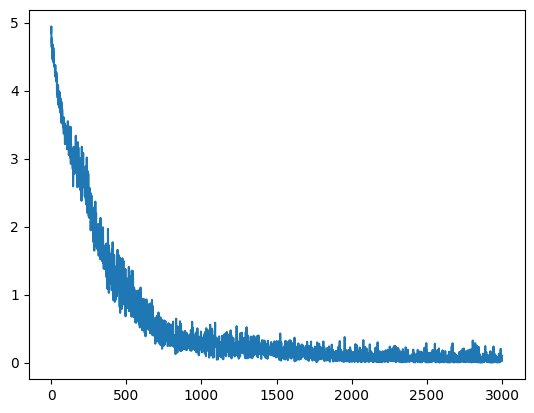

In [15]:
vocab_size = 100
sequence_length = 10
batch_size = 64

tiny_cfg = EasyTransformerConfig(
    d_model=16,
    d_head=8,
    n_heads=1,
    d_mlp=32,
    n_layers=1,
    n_ctx=50,
    act_fn="solu_ln",
    d_vocab=vocab_size,
    normalization_type="LN",
    seed=23,
)
tiny_model = EasyTransformer(tiny_cfg).to(device)
tiny_optimizer = torch.optim.Adam(tiny_model.parameters(), lr=1e-3)
cross_entropy_loss = torch.nn.CrossEntropyLoss()


def evaluate_model(test_model, batch_size, print_output, number_to_print=0):
    test_batch = torch.randint(0, vocab_size, (batch_size, sequence_length)).to(device)
    output_logits = test_model(test_batch, return_type="logits")

    smallest_elements = torch.min(test_batch, dim=1, keepdim=False)[0]
    one_hots = torch.nn.functional.one_hot(smallest_elements, num_classes=tiny_cfg.d_vocab).to(torch.float32)
    loss = cross_entropy_loss(output_logits[:, -1], one_hots)

    if print_output:
        output_probs = torch.softmax(output_logits, dim=-1) # Convert logits to probabilities
        output_tokens = torch.argmax(output_probs, dim=-1) # Get the most likely tokens
        output_tokens = output_tokens[:, -1] # Only take the last token of each sequence
        test_batch_lists = test_batch.cpu().tolist()
        outputs_list = output_tokens.cpu().tolist()
        correct_count = 0
        for index, (sequence, answer_given) in enumerate(list(zip(test_batch_lists, outputs_list))):
            correct_answer = min(sequence)
            answer_in_list = answer_given in sequence
            if answer_given == correct_answer:
                correct_count += 1
            if index < number_to_print:
                print("sequence: ", sequence, "answer_given: ", answer_given)
                if answer_given == correct_answer:
                    print("Correct! Answer is: ", correct_answer)
                elif answer_in_list:
                    answer_given_rank = sorted(list(set(sequence)), reverse=False).index(answer_given)
                    print("Incorrect! Answer given:", answer_given, "which is the", inflect_engine.ordinal(answer_given_rank + 1) , "smallest in the list (not including duplicate)")
                else:
                    print("Incorrect! Answer given:", answer_given, "which is not in the sequence")

        print("\nAccuracy:", correct_count / len(output_tokens) * 100, "%")
        print("Loss", loss.item())
        # print('output_logits[:, -1][0]', output_logits[:, -1][0])
        # print('one hots[0]', one_hots[0])

    return loss

loss_history = []
print('before training')
loss = evaluate_model(tiny_model, batch_size=3000, print_output=True)
for epoch in tqdm.tqdm(range(3001)):
    loss = evaluate_model(tiny_model, batch_size=batch_size, print_output=epoch % 100 == 0, number_to_print=0)
    loss.backward()
    loss_history.append(loss.item())
    tiny_optimizer.step()
    tiny_optimizer.zero_grad()
plt.plot(loss_history)

In [17]:
for act_name in model_cache:
    print(act_name)

hook_embed
hook_pos_embed
blocks.0.hook_resid_pre
blocks.0.ln1.hook_scale
blocks.0.ln1.hook_normalized
blocks.0.attn.hook_q
blocks.0.attn.hook_k
blocks.0.attn.hook_v
blocks.0.attn.hook_attn_scores
blocks.0.attn.hook_attn
blocks.0.attn.hook_z
blocks.0.hook_attn_out
blocks.0.hook_resid_mid
blocks.0.ln2.hook_scale
blocks.0.ln2.hook_normalized
blocks.0.mlp.hook_pre
blocks.0.mlp.hook_mid
blocks.0.mlp.ln.hook_scale
blocks.0.mlp.ln.hook_normalized
blocks.0.mlp.hook_post
blocks.0.hook_mlp_out
blocks.0.hook_resid_post
ln_final.hook_scale
ln_final.hook_normalized


In [55]:
import pysvelte
def show_attention_pattern_for_random_input():
    model_cache = {}
    tiny_model.cache_all(model_cache) # remove_batch_dim=True
    example_sequence = torch.randint(0, vocab_size, (1, sequence_length)).to(device)
    tiny_model(example_sequence)
    tiny_model.reset_hooks()
    tokens = [str(x) for x in example_sequence[0].tolist()]
    print('tokens', tokens, 'len(tokens)', len(tokens))
    # attention = model_cache['blocks.0.attn.hook_attn'][0].permute(1, 2, 0)
    pysvelte.AttentionMulti(tokens=tokens, attention=model_cache['blocks.0.attn.hook_attn'][0].permute(1, 2, 0)).show()
    # hook_q = model_cache['blocks.0.attn.hook_q'] 
    # print('hook_q', hook_q)


# for act_name in model_cache:
#     print(act_name)

for i in range(5):
    show_attention_pattern_for_random_input()

tokens ['44', '5', '53', '51', '87', '58', '62', '21', '96', '81'] len(tokens) 10


tokens ['11', '65', '58', '47', '87', '14', '6', '48', '14', '63'] len(tokens) 10


tokens ['79', '78', '68', '79', '20', '8', '70', '46', '17', '56'] len(tokens) 10


tokens ['14', '7', '98', '61', '65', '6', '46', '85', '74', '44'] len(tokens) 10


tokens ['76', '29', '53', '98', '10', '60', '96', '94', '86', '84'] len(tokens) 10
